#### Importing Libraries

Data : https://www.kaggle.com/mlg-ulb/creditcardfraud

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensordash.tensordash import Tensordash
from sklearn.metrics import plot_roc_curve, confusion_matrix, classification_report, roc_auc_score
from sklearn.utils import class_weight

##### Import Data

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

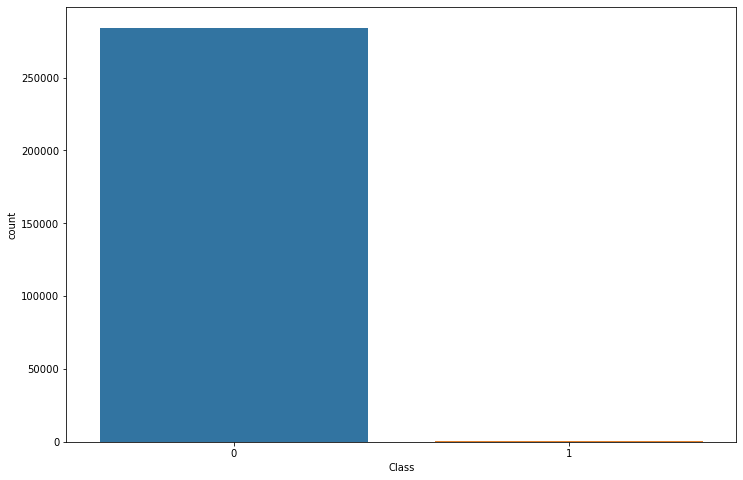

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x =df['Class'])

In [31]:
#Taking out dependant and independant variable
X = df.iloc[:, 1:-1]

y = df.iloc[:,-1]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [33]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [80]:
weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=249927    0
214082    0
106005    0
58619     0
191638    0
         ..
3441      0
233802    0
85418     0
29062     0
17677     0
Name: Class, Length: 199364, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [81]:
class_weights = dict(zip(np.unique(y_train), weights))
print("Computed class weights: ", class_weights)

Computed class weights:  {0: 0.5008642347502763, 1: 289.7732558139535}


In [34]:
len(X.columns)

29

##### Modelling

In [41]:
model = Sequential()

model.add(Dense(50, input_dim = 29, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [36]:
history = Tensordash(ModelName='Credit_Card', email='rishikumar4197@gmail.com')

Enter Tensordash Password :········


In [42]:
model.fit(X_train, y_train, batch_size=16, epochs =10, validation_data=(X_test, y_test), callbacks=[history])

Epoch 1/10
12461/12461 [==============================] - 40s 3ms/step - loss: 0.0311 - accuracy: 0.9980 - val_loss: 0.0104 - val_accuracy: 0.9992
Epoch 2/10
12461/12461 [==============================] - 30s 2ms/step - loss: 0.0096 - accuracy: 0.9992 - val_loss: 0.0137 - val_accuracy: 0.9992
Epoch 3/10
12461/12461 [==============================] - 27s 2ms/step - loss: 0.0100 - accuracy: 0.9994 - val_loss: 0.0156 - val_accuracy: 0.9992
Epoch 4/10
12461/12461 [==============================] - 29s 2ms/step - loss: 0.0084 - accuracy: 0.9993 - val_loss: 0.0144 - val_accuracy: 0.9993
Epoch 5/10
12461/12461 [==============================] - 26s 2ms/step - loss: 0.0111 - accuracy: 0.9993 - val_loss: 0.0154 - val_accuracy: 0.9994
Epoch 6/10
12461/12461 [==============================] - 39s 3ms/step - loss: 0.0085 - accuracy: 0.9994 - val_loss: 0.0107 - val_accuracy: 0.9993
Epoch 7/10
12461/12461 [==============================] - 33s 3ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0

In [43]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

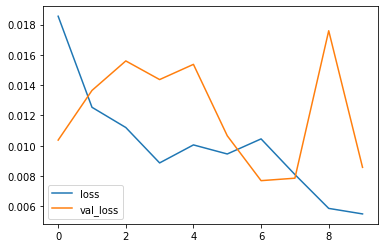

In [44]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

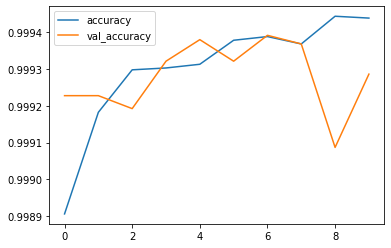

In [45]:
loss[['accuracy', 'val_accuracy']].plot()

In [54]:
y_pred = model.predict_classes(X_test)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [55]:
roc_auc_score(y_test, y_pred)

0.8276440826194621

In [57]:
confusion_matrix(y_test, y_pred)

array([[85285,    10],
       [   51,    97]])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.66      0.76       148

    accuracy                           1.00     85443
   macro avg       0.95      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



##### Weighted Neural Networks

In [60]:
weights_assigned={0:1,1:550}

In [62]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [83]:
model = Sequential()

model.add(Dense(50, input_dim = 29, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer = 'adam')

In [64]:
history = Tensordash(ModelName='Credit_Card_weight', email='rishikumar4197@gmail.com')

Enter Tensordash Password :········


In [82]:
class_weights

{0: 0.5008642347502763, 1: 289.7732558139535}

In [84]:
model.fit(X_train, y_train, batch_size=16, epochs =10, class_weight=class_weights,validation_data=(X_test, y_test), callbacks=[history])

Epoch 1/10
12461/12461 [==============================] - 28s 2ms/step - loss: 3.4666 - accuracy: 0.7913 - val_loss: 0.0998 - val_accuracy: 0.9701
Enter Tensordash Password :········
Epoch 2/10
12461/12461 [==============================] - 24s 2ms/step - loss: 3.2475 - accuracy: 0.8506 - val_loss: 26.3659 - val_accuracy: 0.4707
Epoch 3/10
12461/12461 [==============================] - 25s 2ms/step - loss: 2.7919 - accuracy: 0.8846 - val_loss: 0.1116 - val_accuracy: 0.9751
Epoch 4/10
12461/12461 [==============================] - 25s 2ms/step - loss: 2.9310 - accuracy: 0.8885 - val_loss: 39.2151 - val_accuracy: 0.4943
Epoch 5/10
12461/12461 [==============================] - 26s 2ms/step - loss: 2.1159 - accuracy: 0.9171 - val_loss: 26.5218 - val_accuracy: 0.5841
Epoch 6/10
12461/12461 [==============================] - 25s 2ms/step - loss: 2.3657 - accuracy: 0.9082 - val_loss: 0.1953 - val_accuracy: 0.9666
Epoch 7/10
12461/12461 [==============================] - 29s 2ms/step - loss: 

In [85]:
test_pred1 = model.predict_classes(X_test)

/Applications/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [86]:
roc_auc_score(y_test, test_pred1)

0.9162671523155724

In [68]:
roc_auc_score(y_test, test_pred1)

0.9096979798251854

In [87]:
confusion_matrix(y_test, test_pred1)

array([[83690,  1605],
       [   22,   126]])

In [69]:
confusion_matrix(y_test, test_pred1)

array([[83722,  1573],
       [   24,   124]])

In [88]:
print(classification_report(y_test, test_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.85      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [70]:
print(classification_report(y_test, test_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.84      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.91      0.56     85443
weighted avg       1.00      0.98      0.99     85443



* After initializing weights to the classes, the performance got improved